# ENTRADAS

In [1]:
#Bibliotecas
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import PIL.Image as Image
#plt.style.use("dark_background")

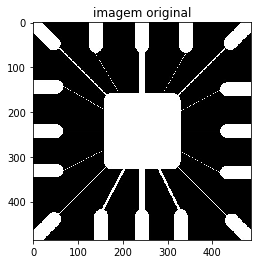

In [16]:
# KERNEL (k) 
N = 15

KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular 
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

# IMPORTAR A IMAGEM
img = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0905(a)(wirebond-mask).jpg"))

# NORMALIZAR A IMAGEM
img_n = (img - img.min())/(img.max()-img.min())


plt.figure();
plt.imshow(img_n, cmap= 'gray');plt.title('imagem original');

# EROSAO

In [3]:
# minha erosao
def erodir(img, k):
  il = img.shape[0]
  ic = img.shape[1]  
  k1 = 1  
  img_erode = np.zeros((il,ic))
  n = k.shape[0]
  borda = int(n-1)//2

  for x in range(borda, il-borda):
    for y in range(borda, ic-borda):
      janela = img[x-borda:x+borda+1,y-borda:y+borda+1]
    
      if k.all() == janela.all():
        img_erode[x,y] = (2**k1 -1)
      else:
        img_erode[x,y] = 0   
  
  return img_erode

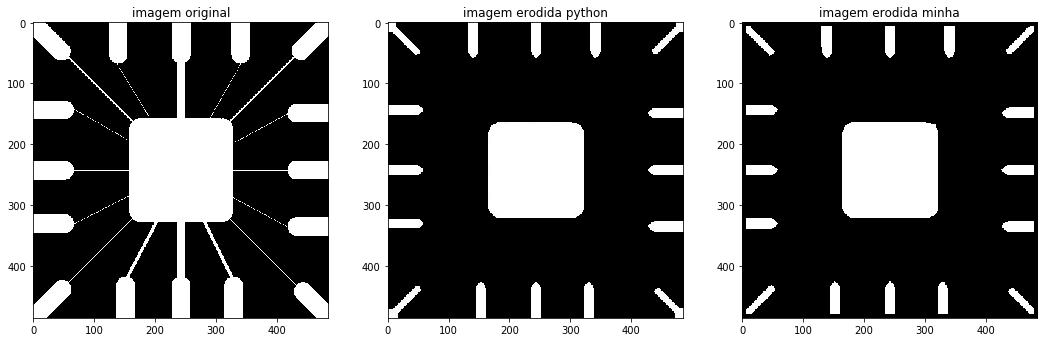

In [17]:
#comparaçao da erosao pronta e minha erosao

 #minha funçao
aha = erodir(img_n, KQ);
 
 #funçao python
erode_pront = cv2.erode(img_n, KQ, iterations=1) 

plt.figure(figsize=[18,10]);
plt.subplot(1,3,1);plt.imshow(img_n, cmap='gray');plt.title('imagem original')
plt.subplot(1,3,2);plt.imshow(erode_pront, cmap='gray');plt.title('imagem erodida python')
plt.subplot(1,3,3);plt.imshow(aha, cmap='gray');plt.title('imagem erodida minha');

# DILATAÇAO

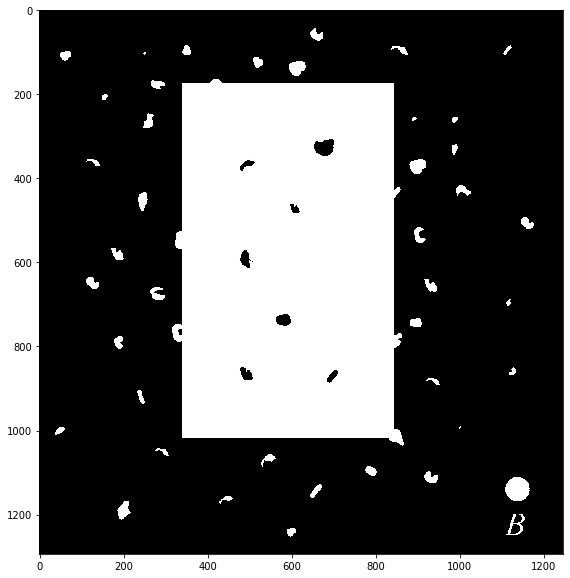

In [18]:
# KERNEL (k) 
N2 = 40

KR2= cv2.getStructuringElement(cv2.MORPH_RECT,(N2,N2)) #   Mascara retangular 
KE2= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N2,N2)) #  Mascara eliptica
KC2= cv2.getStructuringElement(cv2.MORPH_CROSS,(N2,N2)) #   Mascara em cruz

KQ2 = KR2 # escolha da mascara

# IMPORTAR A IMAGEM
img2 = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\FigP0917(noisy_rectangle).jpg"))

# NORMALIZAR A IMAGEM
img_n2 = (img2 - img2.min())/(img2.max()-img2.min())


plt.figure(figsize=(15,10));plt.imshow(img_n2, cmap= 'gray');

In [6]:
#minha função dilatar (hit)
def dilatar(img, k):
  il = img.shape[0]
  ic = img.shape[1]
  k1 = 1  
  img_dilata = np.zeros((il,ic))
  n = k.shape[0]
  borda = int((n-1)//2)

  for x in range(borda, il-borda):
    for y in range(borda, ic-borda):
      janela = img[x-borda:x+borda+1,y-borda:y+borda+1]
      
      if k.any() == janela.any():
        img_dilata[x,y] = (2**k1 - 1);
      else:
        img_dilata[x,y] = 0      
  
  return img_dilata

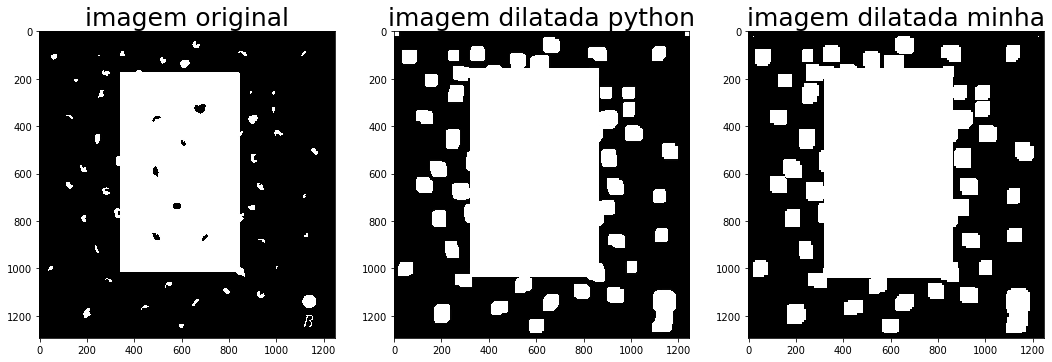

In [7]:
#comparaçao da dilataçao pronta e minha dilataçao

#minha funçao
ahaaha = dilatar(img_n2, KQ2);

#funçao python
dilata_pront = cv2.dilate(img_n2, KQ2, iterations=1) 

plt.figure(figsize=[18,10]);
plt.subplot(1,3,1);plt.imshow(img_n2, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,3,2);plt.imshow(dilata_pront, cmap='gray');plt.title('imagem dilatada python',size=25)
plt.subplot(1,3,3);plt.imshow(ahaaha, cmap='gray');plt.title('imagem dilatada minha',size=25);

# ABERTURA

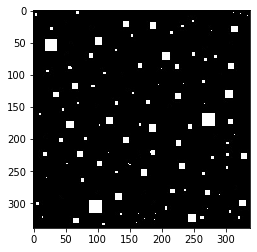

In [21]:
# KERNEL (k) 
N3 = 13

KR3= cv2.getStructuringElement(cv2.MORPH_RECT,(N3,N3)) #   Mascara retangular 
KE3= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N3,N3)) #  Mascara eliptica
KC3= cv2.getStructuringElement(cv2.MORPH_CROSS,(N3,N3)) #   Mascara em cruz

KQ3 = KR3 # escolha da mascara

# IMPORTAR A IMAGEM
img3 = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\FigP0918(left).jpg"))

# NORMALIZAR A IMAGEM
img_n3 = (img3 - img3.min())/(img3.max()-img3.min())


plt.figure();plt.imshow(img_n3, cmap= 'gray');

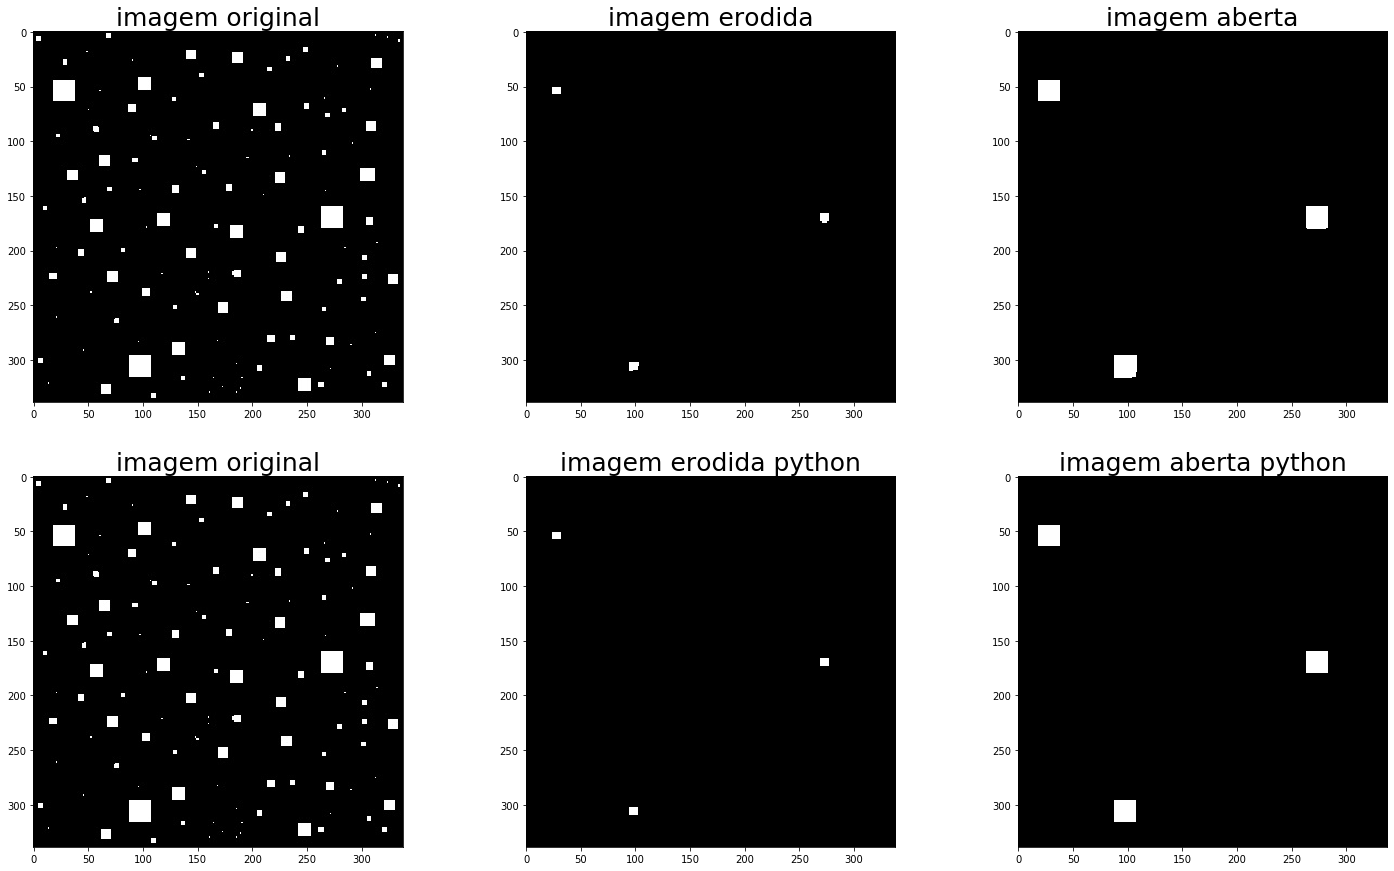

In [22]:
# MINHA FUNÇAO

# Abertura (dilataçao da erosao)
img_erodida = erodir(img_n3,KQ3);
img_aberta =  dilatar(img_erodida, KQ3);   # erosao e dps dilatação 

# FUNÇAO PYTHON

# Abertura (dilataçao da erosao)
img_erodida_py = cv2.erode(img_n3,KQ3, iterations =1);
img_aberta_py =  cv2.dilate(img_erodida_py, KQ3, iterations =1);   # erosao e dps dilatação 

plt.figure(figsize = (25,15));
plt.subplot(2,3,1);plt.imshow(img_n3, cmap='gray');plt.title('imagem original',size=25);
plt.subplot(2,3,2);plt.imshow(img_erodida, cmap='gray');plt.title('imagem erodida',size=25);
plt.subplot(2,3,3);plt.imshow(img_aberta, cmap='gray');plt.title('imagem aberta',size=25);
plt.subplot(2,3,4);plt.imshow(img_n3, cmap='gray');plt.title('imagem original',size=25);
plt.subplot(2,3,5);plt.imshow(img_erodida_py, cmap='gray');plt.title('imagem erodida python',size=25);
plt.subplot(2,3,6);plt.imshow(img_aberta_py, cmap='gray');plt.title('imagem aberta python',size=25);

# FECHAMENTO

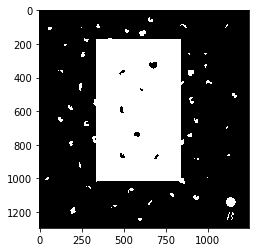

In [10]:
# KERNEL (k) 
N4 = 30

KR4= cv2.getStructuringElement(cv2.MORPH_RECT,(N4,N4)) #   Mascara retangular 
KE4= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N4,N4)) #  Mascara eliptica
KC4= cv2.getStructuringElement(cv2.MORPH_CROSS,(N4,N4)) #   Mascara em cruz

KQ4 = KR4 # escolha da mascara

# IMPORTAR A IMAGEM
img4 = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\FigP0917(noisy_rectangle).jpg"))

# NORMALIZAR A IMAGEM
img_n4 = (img4 - img4.min())/(img4.max()-img4.min())


plt.figure();plt.imshow(img_n4, cmap= 'gray');

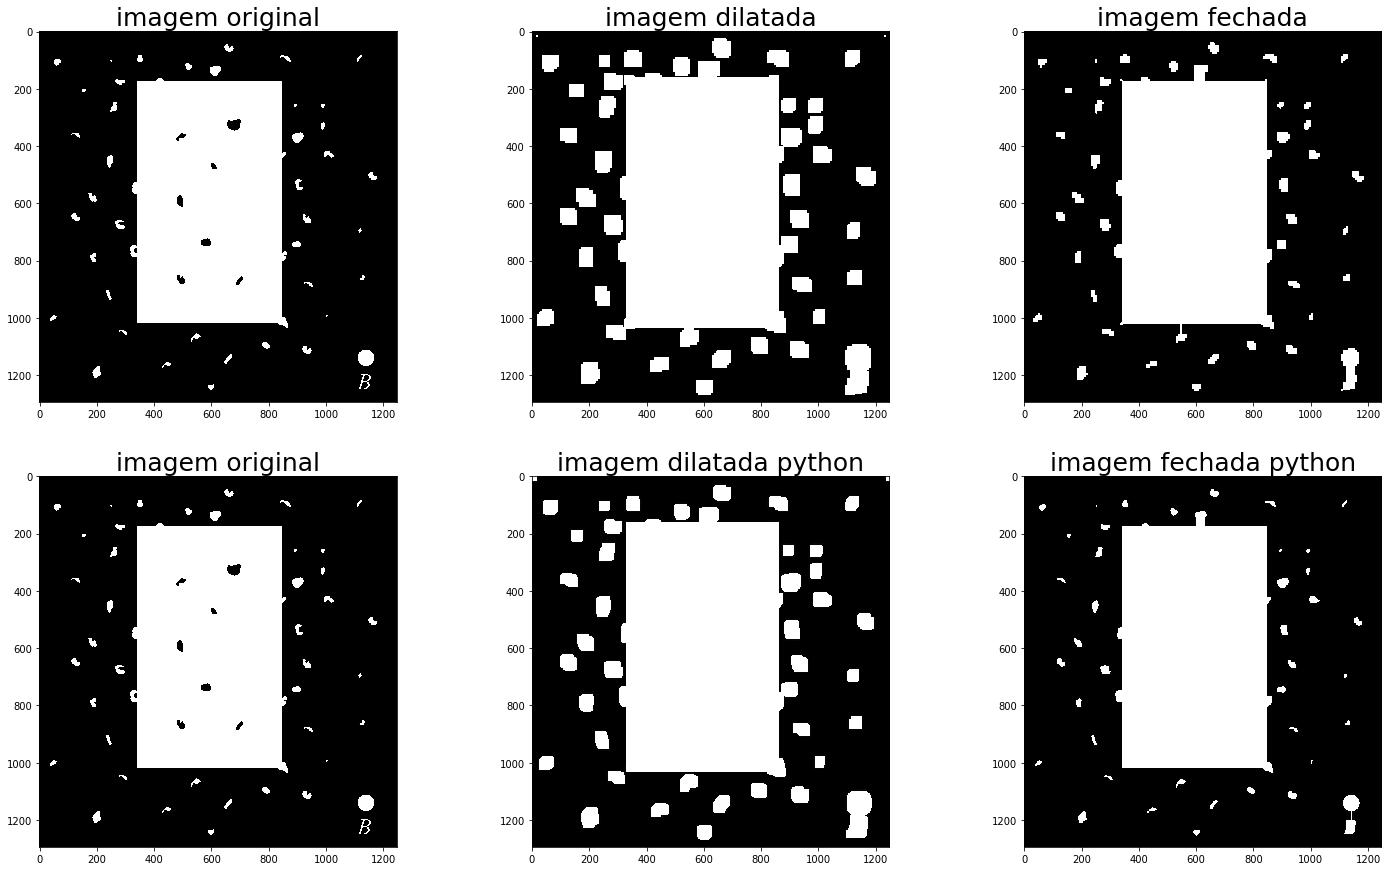

In [11]:
# Minha funcao
# Fechamento
img_dilatada = dilatar(img_n4,KQ4)
img_fechada = erodir(img_dilatada, KQ4);    #dilatação e dps erosao

# Fechamento
img_dilatada_py = cv2.dilate(img_n4,KQ4, iterations =1)
img_fechada_py = cv2.erode(img_dilatada_py, KQ4, iterations =1);    #dilatação e dps erosao


plt.figure(figsize = (25,15));
plt.subplot(2,3,1);plt.imshow(img_n4, cmap='gray');plt.title('imagem original',size=25);
plt.subplot(2,3,2);plt.imshow(img_dilatada, cmap='gray');plt.title('imagem dilatada',size=25);
plt.subplot(2,3,3);plt.imshow(img_fechada, cmap='gray');plt.title('imagem fechada',size=25);
plt.subplot(2,3,4);plt.imshow(img_n4, cmap='gray');plt.title('imagem original',size=25);
plt.subplot(2,3,5);plt.imshow(img_dilatada_py, cmap='gray');plt.title('imagem dilatada python',size=25);
plt.subplot(2,3,6);plt.imshow(img_fechada_py, cmap='gray');plt.title('imagem fechada python',size=25);

# ABERTURA DO FECHAMENTO

In [12]:
# KERNEL (k) 
N5 = 50

KR5= cv2.getStructuringElement(cv2.MORPH_RECT,(N5,N5)) #   Mascara retangular 
KE5= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N5,N5)) #  Mascara eliptica
KC5= cv2.getStructuringElement(cv2.MORPH_CROSS,(N5,N5)) #   Mascara em cruz

KQ5 = KR5 # escolha da mascara

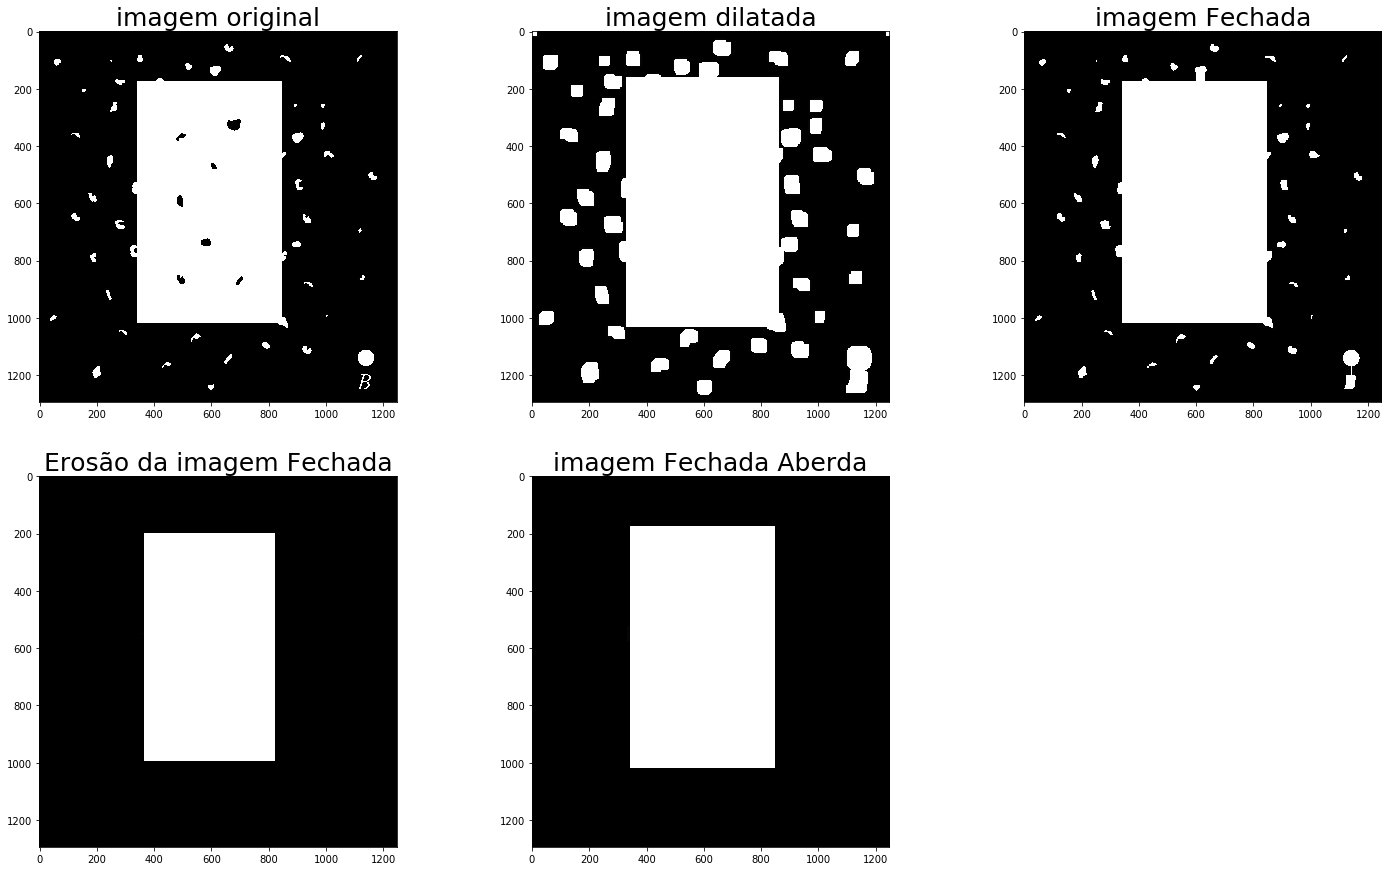

In [13]:
# FUNÇAO PYTHON

# Fechamento
imag_dilatada_py = cv2.dilate(img_n4,KQ4, iterations =1)
imag_fechada_py = cv2.erode(imag_dilatada_py, KQ4, iterations =1);    #dilatação e dps erosao

# Abertura (dilataçao da erosao)
imag_erodida_py = cv2.erode(imag_fechada_py,KQ5, iterations =1);
imag_aberta_py =  cv2.dilate(imag_erodida_py, KQ5, iterations =1);   # erosao e dps dilatação 

plt.figure(figsize = (25,15));
plt.subplot(2,3,1);plt.imshow(img_n4, cmap='gray');plt.title('imagem original',size=25);
plt.subplot(2,3,2);plt.imshow(imag_dilatada_py, cmap='gray');plt.title('imagem dilatada',size=25);
plt.subplot(2,3,3);plt.imshow(imag_fechada_py, cmap='gray');plt.title('imagem Fechada',size=25);
plt.subplot(2,3,4);plt.imshow(imag_erodida_py, cmap='gray');plt.title('Erosão da imagem Fechada',size=25);
plt.subplot(2,3,5);plt.imshow(imag_aberta_py, cmap='gray');plt.title('imagem Fechada Aberda',size=25);